# Problem Statement
Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [1]:
#Importing EDA and required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Model Building Libraries required
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#Ignoring warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Setting figure parameters
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [4]:
#importing dataset
df = pd.read_csv("bank-full.csv", sep=";")

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:>

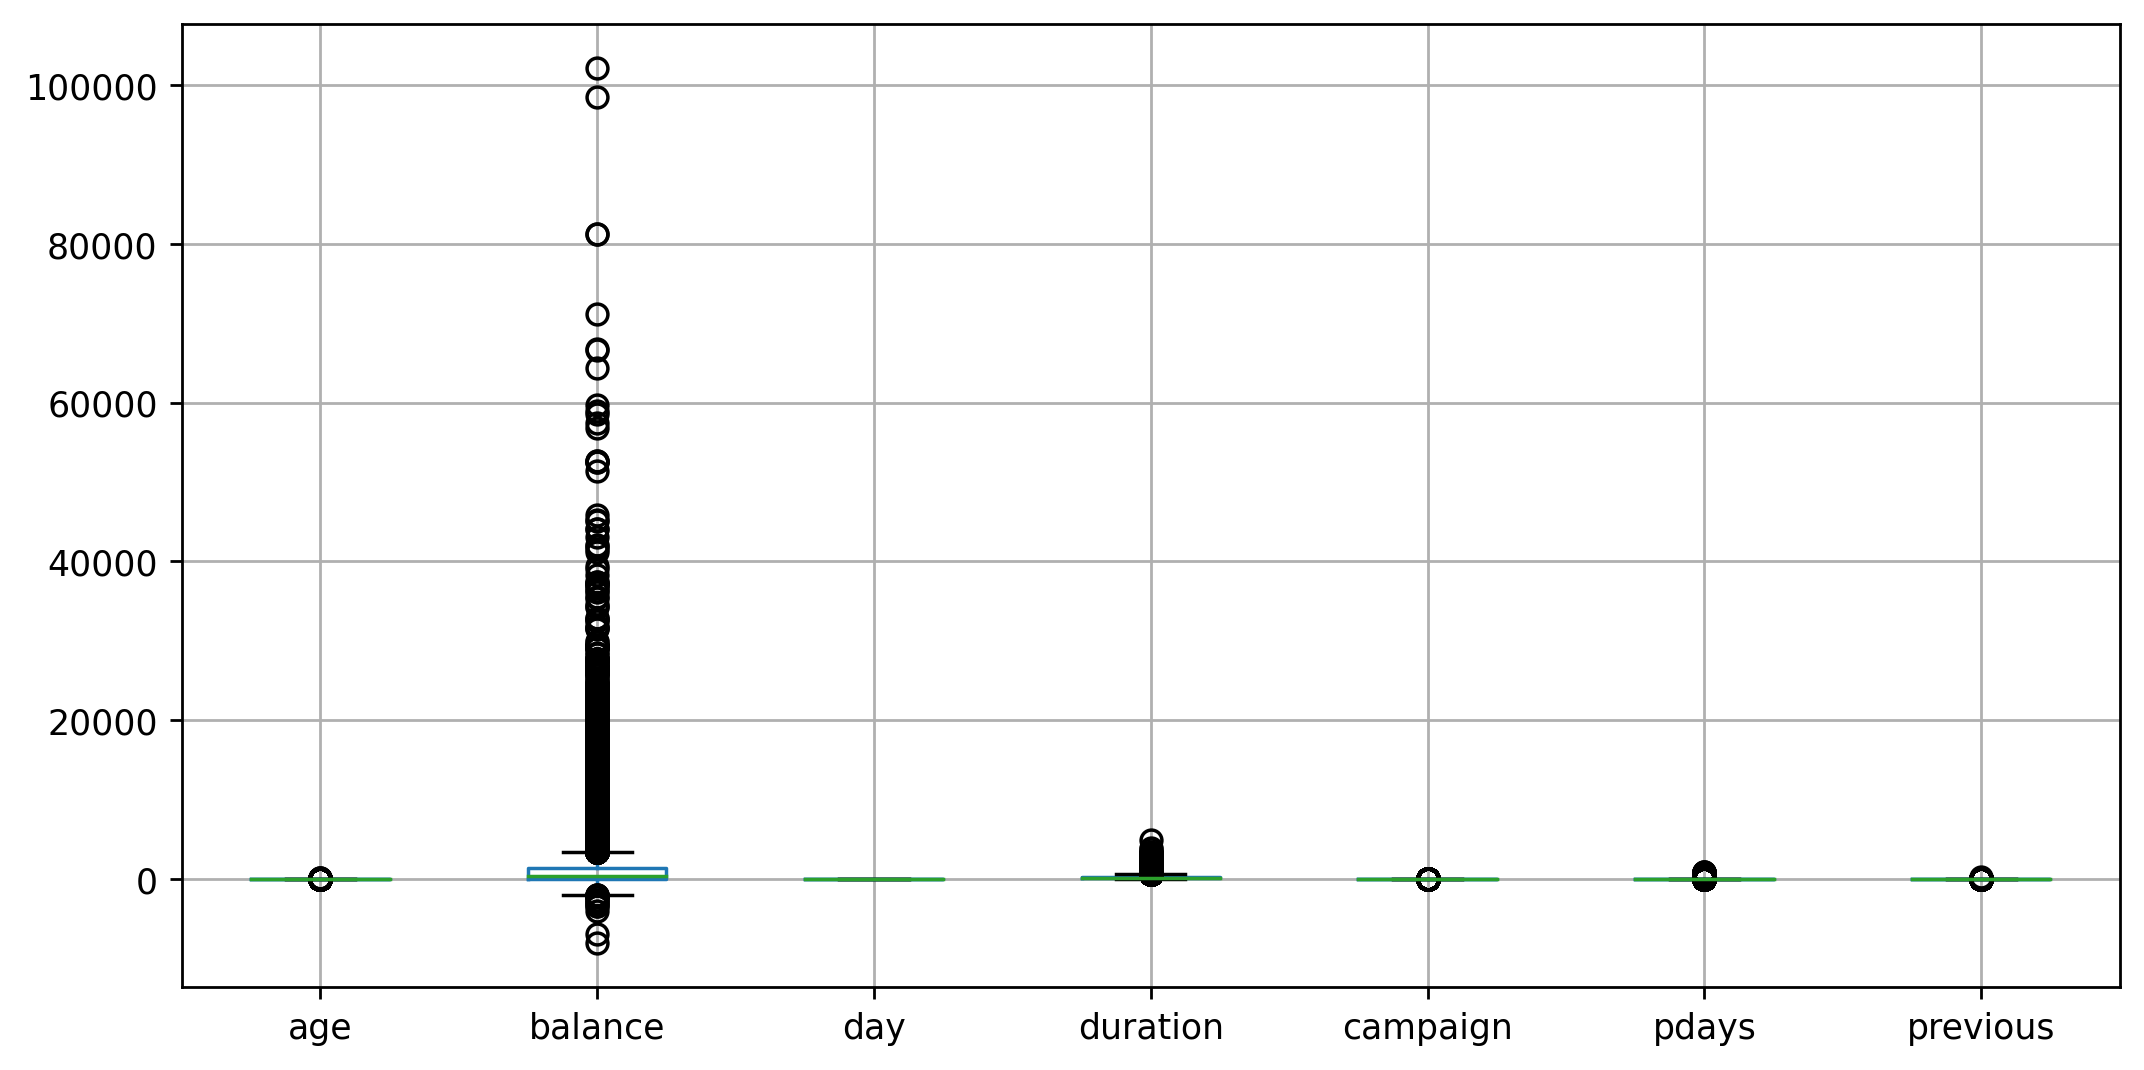

In [7]:
df.boxplot()

In [8]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [9]:
df.replace(('yes', 'no'), (1,0), inplace=True)

In [10]:
x = df.iloc[:,:-1]
y = df['y']

In [11]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown


In [12]:
x.drop(columns= {'marital', 'education', 'contact', 'month'}, inplace=True)

In [13]:
x

,age,job,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome
0,58,management,0,2143,1,0,5,261,1,-1,0,unknown
1,44,technician,0,29,1,0,5,151,1,-1,0,unknown
2,33,entrepreneur,0,2,1,1,5,76,1,-1,0,unknown
3,47,blue-collar,0,1506,1,0,5,92,1,-1,0,unknown
4,33,unknown,0,1,0,0,5,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,0,825,0,0,17,977,3,-1,0,unknown
45207,71,retired,0,1729,0,0,17,456,2,-1,0,unknown
45208,72,retired,0,5715,0,0,17,1127,5,184,3,success
45209,57,blue-collar,0,668,0,0,17,508,4,-1,0,unknown


In [14]:
x = pd.get_dummies(data=x, columns= ['job', 'poutcome'])

In [15]:
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8, random_state=0)

In [17]:
xtrain

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
13932,57,0,658,0,0,10,724,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
9894,37,0,1699,0,0,9,63,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
39946,35,0,2823,1,0,2,102,4,96,2,...,0,0,0,1,0,0,1,0,0,0
9217,35,0,214,1,1,5,247,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
4124,38,0,323,1,0,19,138,1,-1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,35,0,995,0,0,5,39,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
21243,35,0,750,1,0,18,233,12,-1,0,...,0,0,0,0,0,0,0,0,0,1
42613,35,0,323,0,0,11,261,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
43567,70,0,616,0,0,27,149,2,182,1,...,0,0,0,0,0,0,1,0,0,0


In [18]:
lg = LogisticRegression()

In [19]:
lg.fit(xtrain,ytrain)

ypred = lg.predict(xtest)

In [20]:
ypred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [21]:
#Model Evaluation
print("Actual values", ytest[:50].values)
print("Predictied values", ytest[:50].values)

Actual values [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0]
Predictied values [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0]


In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [23]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.58      0.19      0.29      1063

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [35]:
lg.score(x,y)

0.8908893853265798

We got good accuracy of almost 90% and precision value also of about 58%

In [24]:
confusion_matrix(ytest,ypred)

array([[7832,  148],
       [ 859,  204]], dtype=int64)

Plotting ROC curve

In [27]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([1.69030372e-04, 6.59118952e-01, 2.11265166e-02, ...,
       4.57865594e-02, 6.25518279e-01, 9.85627269e-02])

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

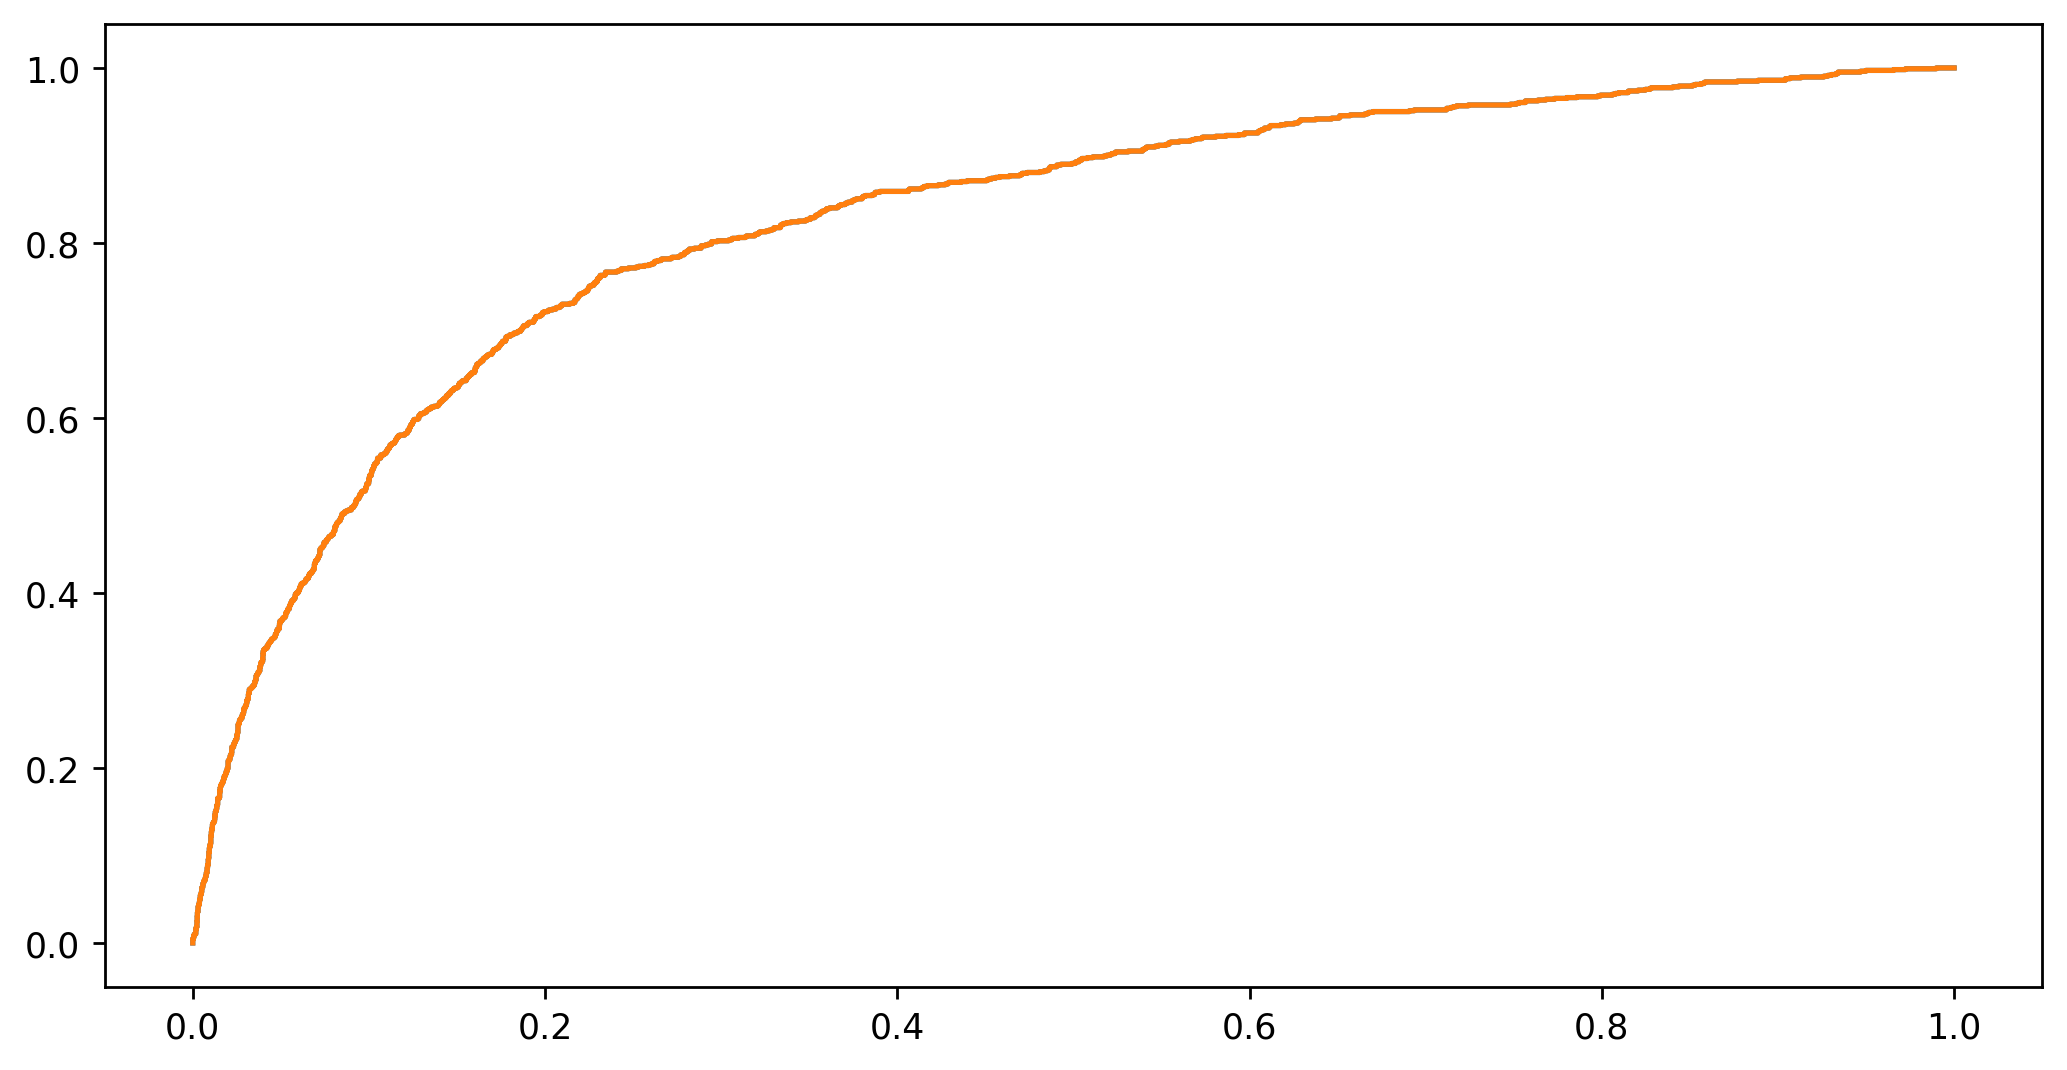

In [31]:
auc = roc_auc_score(ytest, ypred)

fpr, tpr, threshold = roc_curve(ytest, proba)
plt.plot(fpr,tpr,label = 'AUC = %0.2f'%auc)
plt.show()


In [32]:
auc

0.5866816618215341